In [1]:
#!pip install ephem


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 6.2 MB/s eta 0:00:00


In [2]:
# import pyephem for calculating positions of objects
import ephem
import numpy as np
import time
import datetime

In [3]:
# observer information for Nashville, TN
observer = ephem.Observer()
observer.lat = '35.846584' # Latitude for Nashville, TN (as an example)
observer.lon = '-86.367874' # Longitude for Nashville, TN
observer.date = '2024/01/03 18:00:00' # Example date and time (YYYY/MM/DD HH:MM:SS)

In [4]:
# calculate the position of the sun
sun = ephem.Sun()  #  load the Sun data
sun.compute(observer)  # compute the position of the Sun for this observer
print(f'Sun’s position:  Azimuth = {sun.az}, Altitude ={sun.alt}')
print(f'Sun’s position:  Right Ascension = {sun.ra}, Declination ={sun.dec}')


Sun’s position:  Azimuth = 182:44:25.8, Altitude =31:18:34.6
Sun’s position:  Right Ascension = 18:55:48.74, Declination =-22:49:14.2


In [ ]:
observer.date += ephem.hour

sun.compute(observer)
print(observer.date)
print(f'Sun’s position:  Azimuth = {sun.az}, Altitude ={sun.alt}')
print(f'Sun’s position:  Right Ascension = {sun.ra}, Declination ={sun.dec}')

2024/1/3 19:00:00
Sun’s position:  Azimuth = 198:31:17.3, Altitude =29:03:49.0
Sun’s position:  Right Ascension = 18:55:59.61, Declination =-22:48:59.4


In [ ]:
ra = '10:00:00' # Right Ascension
dec = '15:00:00' # Declination
date = '2024-01-10' # Date
thetime = '06:00:00' # Time (UTC)
elevation = 180 # meters

observer = ephem.Observer()
observer.lat = '35.846584' # Latitude for Nashville, TN (as an example)
observer.lon = '-86.367874' # Longitude for Nashville, TN
observer.date = '2024/01/25 12:00:00' # Example date and time (YYYY/MM/DD HH:MM:SS)
observer.elevation = elevation
observer.date = f'{date} {thetime}'


sun = ephem.Sun(observer.date)

for i in range(15):
    sun.compute(observer)
    print(observer.date)
    print(f'Sun’s position:  Right Ascension = {sun.ra}, Declination ={sun.dec}')
    print(f'Suns Geocentric position: Right Ascension = {sun.g_ra}, Declination ={sun.g_dec}')
    x = np.float32(sun.alt)
    print('Sun’s altitude in radians = ', x)
    print(f'Sun’s position:  Azimuth = {sun.az}, Altitude ={sun.alt}')

    # create an object at the sun's location
    star = ephem.FixedBody()
    star._ra = sun.a_ra
    star._dec = sun.a_dec
    #star._distance = sun.earth_distance
    star.compute(observer)
    print(f'Star’s position geocentric ra:  Azimuth = {star.az}, Altitude ={star.alt}')

    # create an object at the sun's location
    star = ephem.FixedBody()
    star._ra = sun.g_ra
    star._dec = sun.g_dec
    star.compute(observer)

    print(f'Star’s position:  Azimuth = {star.az}, Altitude ={star.alt}')

    # difference in az and alt in arc minutes
    azdiff = (star.az - sun.az) * 180. / np.pi
    altdiff = (star.alt - sun.alt)

    print(f'Difference in azimuth = {azdiff}, Difference in altitude ={altdiff}')

    # ecliptic coordinates
    print(f'Sun’s ecliptic longitude = {sun.hlong}, Sun’s ecliptic latitude ={sun.hlat}')

    print('___')

    # add one hour to the date
    observer.date += ephem.hour


2024/1/10 06:00:00
Sun’s position:  Right Ascension = 19:24:16.96, Declination =-22:01:34.9
Suns Geocentric position: Right Ascension = 19:24:16.94, Declination =-22:01:32.8
Sun’s altitude in radians =  -1.3279885
Sun’s position:  Azimuth = 7:04:22.0, Altitude =-76:05:17.3
Star’s position geocentric ra:  Azimuth = 7:04:22.0, Altitude =-76:05:15.2
Star’s position:  Azimuth = 5:42:23.1, Altitude =-76:04:26.5
Difference in azimuth = -1.36635330336484, Difference in altitude =0.00024628639221191406
Sun’s ecliptic longitude = 109:28:30.0, Sun’s ecliptic latitude =0:00:00.4
___
2024/1/10 07:00:00
Sun’s position:  Right Ascension = 19:24:27.98, Declination =-22:01:13.1
Suns Geocentric position: Right Ascension = 19:24:27.83, Declination =-22:01:10.9
Sun’s altitude in radians =  -1.2192943
Sun’s position:  Azimuth = 51:12:04.8, Altitude =-69:51:37.5
Star’s position geocentric ra:  Azimuth = 51:12:04.9, Altitude =-69:51:34.5
Star’s position:  Azimuth = 50:24:44.4, Altitude =-70:02:48.6
Differen

In [ ]:
import ephem
import numpy as np
import datetime

# Observer information for MTSU
observer = ephem.Observer()
observer.lat = '35.846584'  # Latitude for MTSU
observer.lon = '-86.367874'  # Longitude for MTSU
observer.elevation = 180  # Elevation in meters

# Dates for tracking the sun's motion
dates = ['2024/12/21', '2024/03/21', '2024/06/21']

# Loop over each date
for date in dates:
    observer.date = f'{date} 06:00:00'  # Start time (6 AM)
    sun = ephem.Sun(observer)

    # Print sun's position at hourly intervals
    print(f"Sun's positions for {date}:")
    for _ in range(15):  # Hourly from 6 AM to 8 PM
        sun.compute(observer)
        print(f"  Time: {observer.date}, Azimuth: {sun.az}, Altitude: {sun.alt}")
        observer.date += ephem.hour  # Increment time by one hour
    print('___')


Sun's positions for 2024/12/21:
  Time: 2024/12/21 06:00:00, Azimuth: 17:02:27.4, Altitude: -77:05:48.8
  Time: 2024/12/21 07:00:00, Azimuth: 58:17:28.6, Altitude: -69:21:09.4
  Time: 2024/12/21 08:00:00, Azimuth: 76:35:14.8, Altitude: -58:05:42.6
  Time: 2024/12/21 09:00:00, Azimuth: 87:33:33.6, Altitude: -46:03:57.4
  Time: 2024/12/21 10:00:00, Azimuth: 96:03:05.2, Altitude: -33:55:46.4
  Time: 2024/12/21 11:00:00, Azimuth: 103:45:13.4, Altitude: -21:57:58.1
  Time: 2024/12/21 12:00:00, Azimuth: 111:29:50.9, Altitude: -10:23:20.9
  Time: 2024/12/21 13:00:00, Azimuth: 119:51:28.5, Altitude: 0:57:42.8
  Time: 2024/12/21 14:00:00, Azimuth: 129:20:48.9, Altitude: 10:39:02.2
  Time: 2024/12/21 15:00:00, Azimuth: 140:26:50.5, Altitude: 19:14:03.0
  Time: 2024/12/21 16:00:00, Azimuth: 153:29:51.6, Altitude: 25:51:42.7
  Time: 2024/12/21 17:00:00, Azimuth: 168:23:41.1, Altitude: 29:50:23.7
  Time: 2024/12/21 18:00:00, Azimuth: 184:17:38.2, Altitude: 30:37:04.1
  Time: 2024/12/21 19:00:00, Az

Sun's positions and shadow paths for 2024/12/21:
  Time: 2024/12/21 06:00:00, Azimuth: 17:02:27.4, Altitude: -77:05:48.8, Shadow Length: inf, Shadow Direction: 0
  Time: 2024/12/21 07:00:00, Azimuth: 58:17:28.6, Altitude: -69:21:09.4, Shadow Length: inf, Shadow Direction: 0
  Time: 2024/12/21 08:00:00, Azimuth: 76:35:14.8, Altitude: -58:05:42.6, Shadow Length: inf, Shadow Direction: 0
  Time: 2024/12/21 09:00:00, Azimuth: 87:33:33.6, Altitude: -46:03:57.4, Shadow Length: inf, Shadow Direction: 0
  Time: 2024/12/21 10:00:00, Azimuth: 96:03:05.2, Altitude: -33:55:46.4, Shadow Length: inf, Shadow Direction: 0
  Time: 2024/12/21 11:00:00, Azimuth: 103:45:13.4, Altitude: -21:57:58.1, Shadow Length: inf, Shadow Direction: 0
  Time: 2024/12/21 12:00:00, Azimuth: 111:29:50.9, Altitude: -10:23:20.9, Shadow Length: inf, Shadow Direction: 0
  Time: 2024/12/21 13:00:00, Azimuth: 119:51:28.5, Altitude: 0:57:42.8, Shadow Length: 59.55976854304235, Shadow Direction: 5.2335077842050275
  Time: 2024/12

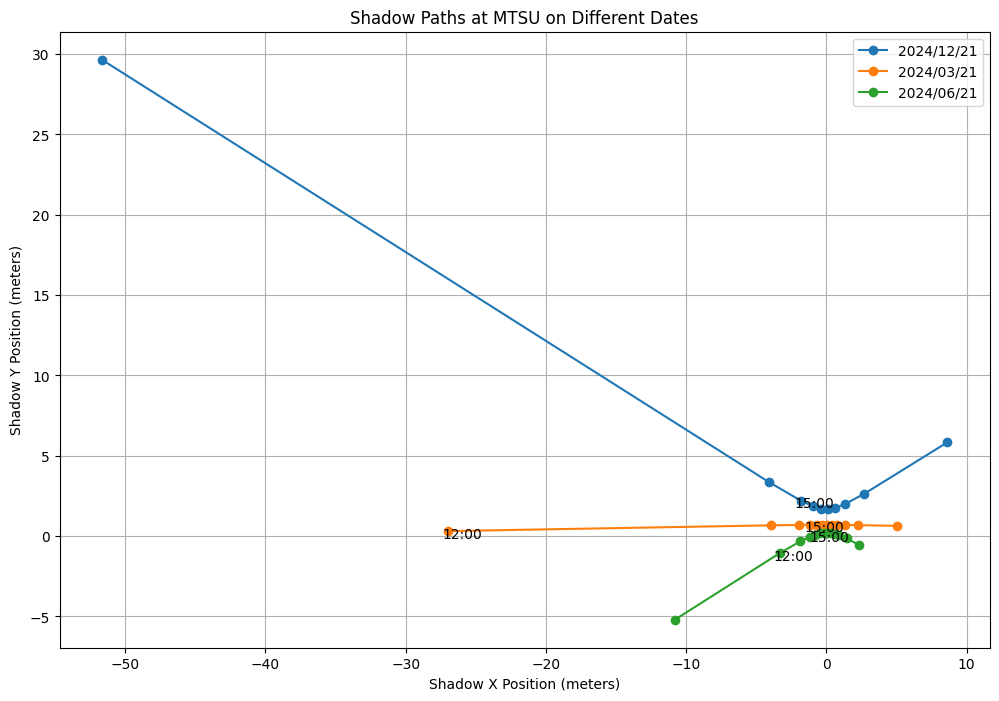

In [ ]:
import ephem
import datetime
import matplotlib.pyplot as plt
import numpy as np
import math

def calculate_shadow_length_and_direction(sun_altitude, sun_azimuth, object_height):
    if sun_altitude <= 0:
        return float('inf'), 0  # Sun is below the horizon
    shadow_length = object_height / math.tan(sun_altitude)
    shadow_direction = sun_azimuth + math.pi  # Shadow direction is opposite sun azimuth
    return shadow_length, shadow_direction

# Observer information for MTSU
observer = ephem.Observer()
observer.lat = '35.846584' # Latitude for Nashville, TN (as an example)
observer.lon = '-86.367874'  # Longitude for MTSU
observer.elevation = 180  # Elevation in meters

# Object height (in meters)
object_height = 1.0

# Dates for tracking the sun's motion
dates = ['2024/12/21', '2024/03/21', '2024/06/21']

# Prepare plot
plt.figure(figsize=(12, 8))

# Loop over each date
for date in dates:
    observer.date = f'{date} 06:00:00'  # Start time (6 AM)
    sun = ephem.Sun(observer)

    # Lists to store shadow positions and times
    shadow_x_positions = []
    shadow_y_positions = []
    times = []

    # Print sun's position at hourly intervals and calculate shadow path
    print(f"Sun's positions and shadow paths for {date}:")
    for hour in range(6, 24):  # Hourly from 6 AM to 8 PM
        observer.date = datetime.datetime.strptime(f'{date} {hour:02d}:00:00', '%Y/%m/%d %H:%M:%S')
        sun.compute(observer)

        # Calculate shadow length and direction
        shadow_length, shadow_direction = calculate_shadow_length_and_direction(sun.alt, sun.az, object_height)

        # Convert polar to Cartesian coordinates for shadow tip position
        shadow_x = shadow_length * math.sin(shadow_direction)
        shadow_y = shadow_length * math.cos(shadow_direction)

        shadow_x_positions.append(shadow_x)
        shadow_y_positions.append(shadow_y)
        times.append(hour)

        print(f"  Time: {observer.date}, Azimuth: {sun.az}, Altitude: {sun.alt}, Shadow Length: {shadow_length}, Shadow Direction: {shadow_direction}")

    # Plot the shadow path for the date
    plt.plot(shadow_x_positions, shadow_y_positions, marker='o', label=date)

    # Annotate specific times
    for time, x, y in zip(times, shadow_x_positions, shadow_y_positions):
        if time in [9, 12, 15]:
            plt.annotate(f'{time}:00', (x, y), textcoords="offset points", xytext=(10,-5), ha='center')

    print('___')

# Finalize plot
plt.title('Shadow Paths at MTSU on Different Dates')
plt.xlabel('Shadow X Position (meters)')
plt.ylabel('Shadow Y Position (meters)')
plt.legend()
plt.grid(True)
plt.show()



Time: 2024/1/10 06:00:00, Sun Azimuth: 7:04:22.0, Altitude: -76:05:17.3, Shadow Length: inf, Shadow Direction: 0
Time: 2024/1/10 07:00:00, Sun Azimuth: 51:12:04.8, Altitude: -69:51:37.5, Shadow Length: inf, Shadow Direction: 0
Time: 2024/1/10 08:00:00, Sun Azimuth: 72:08:33.2, Altitude: -59:05:55.9, Shadow Length: inf, Shadow Direction: 0
Time: 2024/1/10 09:00:00, Sun Azimuth: 84:16:21.9, Altitude: -47:12:07.8, Shadow Length: inf, Shadow Direction: 0
Time: 2024/1/10 10:00:00, Sun Azimuth: 93:18:19.3, Altitude: -35:03:31.5, Shadow Length: inf, Shadow Direction: 0
Time: 2024/1/10 11:00:00, Sun Azimuth: 101:15:23.9, Altitude: -23:00:33.8, Shadow Length: inf, Shadow Direction: 0
Time: 2024/1/10 12:00:00, Sun Azimuth: 109:04:55.6, Altitude: -11:16:56.9, Shadow Length: inf, Shadow Direction: 0
Time: 2024/1/10 13:00:00, Sun Azimuth: 117:24:43.4, Altitude: 0:22:21.0, Shadow Length: 153.8088547669962, Shadow Direction: 5.19081965287263
Time: 2024/1/10 14:00:00, Sun Azimuth: 126:47:36.2, Altitud

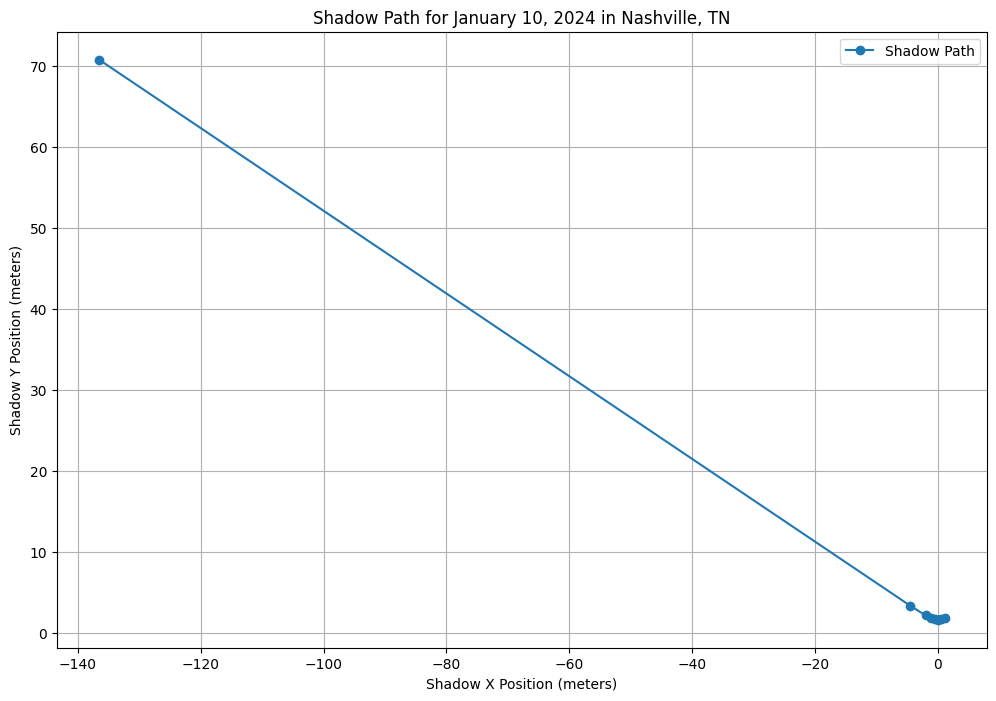

In [ ]:
import ephem
import numpy as np
import datetime
import matplotlib.pyplot as plt
import math

def calculate_shadow_length_and_direction(sun_altitude, sun_azimuth, object_height):
    if sun_altitude <= 0:
        return float('inf'), 0  # Sun is below the horizon
    shadow_length = object_height / math.tan(sun_altitude)
    shadow_direction = sun_azimuth + math.pi  # Shadow direction is opposite sun azimuth
    return shadow_length, shadow_direction

# Observer information for Nashville, TN
observer = ephem.Observer()
observer.lat = '35.846584'
observer.lon = '-86.367874'
observer.elevation = 180  # meters
date = '2024-01-10'

# Prepare plot
plt.figure(figsize=(12, 8))

# Store shadow positions
shadow_x_positions = []
shadow_y_positions = []

# Object height (in meters)
object_height = 1.0

# Loop over the day in hourly intervals
observer.date = f'{date} 06:00:00'  # Start time (6 AM)
for i in range(15):  # Hourly from 6 AM to 8 PM
    sun = ephem.Sun(observer)
    sun.compute(observer)

    # Calculate shadow length and direction
    shadow_length, shadow_direction = calculate_shadow_length_and_direction(sun.alt, sun.az, object_height)

    # Convert polar to Cartesian coordinates for shadow tip position
    shadow_x = shadow_length * math.sin(shadow_direction)
    shadow_y = shadow_length * math.cos(shadow_direction)

    shadow_x_positions.append(shadow_x)
    shadow_y_positions.append(shadow_y)

    print(f"Time: {observer.date}, Sun Azimuth: {sun.az}, Altitude: {sun.alt}, Shadow Length: {shadow_length}, Shadow Direction: {shadow_direction}")

    observer.date += ephem.hour  # Increment time by one hour

# Plot the shadow path
plt.plot(shadow_x_positions, shadow_y_positions, marker='o', label='Shadow Path')
plt.title('Shadow Path for January 10, 2024 in Nashville, TN')
plt.xlabel('Shadow X Position (meters)')
plt.ylabel('Shadow Y Position (meters)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import ephem
import numpy as np
import datetime

# Function to adjust UTC time to local time (CST or CDT)
def adjust_to_local_time(utc_time, date):
    # Check if date is in Daylight Saving Time (DST) period for 2024
    dst_start = datetime.datetime(2024, 3, 10, 2, 0, 0)  # DST starts on March 10, 2024
    dst_end = datetime.datetime(2024, 11, 3, 2, 0, 0)   # DST ends on November 3, 2024

    # Adjust for timezone (UTC-6 for CST, UTC-5 for CDT)
    if dst_start <= date <= dst_end:
        return utc_time - datetime.timedelta(hours=5)  # CDT
    else:
        return utc_time - datetime.timedelta(hours=6)  # CST

# Observer information for MTSU
observer = ephem.Observer()
observer.lat = '35.846584'  # Latitude for MTSU
observer.lon = '-86.367874'  # Longitude for MTSU
observer.elevation = 180  # Elevation in meters

# Dates for tracking the sun's motion
dates = ['2024/12/21', '2024/03/21', '2024/06/21']

# Loop over each date
for date in dates:
    observer.date = f'{date} 06:00:00'  # Start time (6 AM UTC)
    sun = ephem.Sun(observer)

    # Print sun's position at hourly intervals
    print(f"Sun's positions for {date} (Local Time):")
    for _ in range(15):  # Hourly from 6 AM to 8 PM
        sun.compute(observer)
        utc_time = observer.date.datetime()
        local_time = adjust_to_local_time(utc_time, datetime.datetime.strptime(date, "%Y/%m/%d"))
        print(f"  Time: {local_time}, Azimuth: {sun.az}, Altitude: {sun.alt}")
        observer.date += ephem.hour  # Increment time by one hour
    print('___')


Sun's positions for 2024/12/21 (Local Time):
  Time: 2024-12-21 00:00:00, Azimuth: 17:02:27.4, Altitude: -77:05:48.8
  Time: 2024-12-21 01:00:00, Azimuth: 58:17:28.6, Altitude: -69:21:09.4
  Time: 2024-12-21 02:00:00, Azimuth: 76:35:14.8, Altitude: -58:05:42.6
  Time: 2024-12-21 03:00:00, Azimuth: 87:33:33.6, Altitude: -46:03:57.4
  Time: 2024-12-21 03:59:59.999999, Azimuth: 96:03:05.2, Altitude: -33:55:46.4
  Time: 2024-12-21 04:59:59.999999, Azimuth: 103:45:13.4, Altitude: -21:57:58.1
  Time: 2024-12-21 05:59:59.999999, Azimuth: 111:29:50.9, Altitude: -10:23:20.9
  Time: 2024-12-21 06:59:59.999999, Azimuth: 119:51:28.5, Altitude: 0:57:42.8
  Time: 2024-12-21 07:59:59.999997, Azimuth: 129:20:48.9, Altitude: 10:39:02.2
  Time: 2024-12-21 08:59:59.999997, Azimuth: 140:26:50.5, Altitude: 19:14:03.0
  Time: 2024-12-21 09:59:59.999997, Azimuth: 153:29:51.6, Altitude: 25:51:42.7
  Time: 2024-12-21 10:59:59.999997, Azimuth: 168:23:41.1, Altitude: 29:50:23.7
  Time: 2024-12-21 11:59:59.999997

Time: 08:00, Azimuth: 129:20:48.9, Altitude: 10:39:02.2, Shadow Length: 5.32m
Time: 09:00, Azimuth: 140:26:50.5, Altitude: 19:14:03.0, Shadow Length: 2.87m
Time: 09:59, Azimuth: 153:29:51.6, Altitude: 25:51:42.7, Shadow Length: 2.06m
Time: 10:59, Azimuth: 168:23:41.1, Altitude: 29:50:23.7, Shadow Length: 1.74m
Time: 11:59, Azimuth: 184:17:38.2, Altitude: 30:37:04.1, Shadow Length: 1.69m
Time: 12:59, Azimuth: 199:48:22.7, Altitude: 28:04:20.5, Shadow Length: 1.88m
Time: 13:59, Azimuth: 213:45:54.2, Altitude: 22:35:12.2, Shadow Length: 2.40m
Time: 14:59, Azimuth: 225:44:37.9, Altitude: 14:49:20.8, Shadow Length: 3.78m
Time: 08:00, Azimuth: 99:37:08.8, Altitude: 14:00:39.8, Shadow Length: 4.01m
Time: 09:00, Azimuth: 109:31:54.1, Altitude: 25:45:13.5, Shadow Length: 2.07m
Time: 10:00, Azimuth: 121:31:19.1, Altitude: 36:43:43.9, Shadow Length: 1.34m
Time: 10:59, Azimuth: 137:09:13.6, Altitude: 46:09:48.1, Shadow Length: 0.96m
Time: 11:59, Azimuth: 158:00:44.8, Altitude: 52:44:31.0, Shadow L

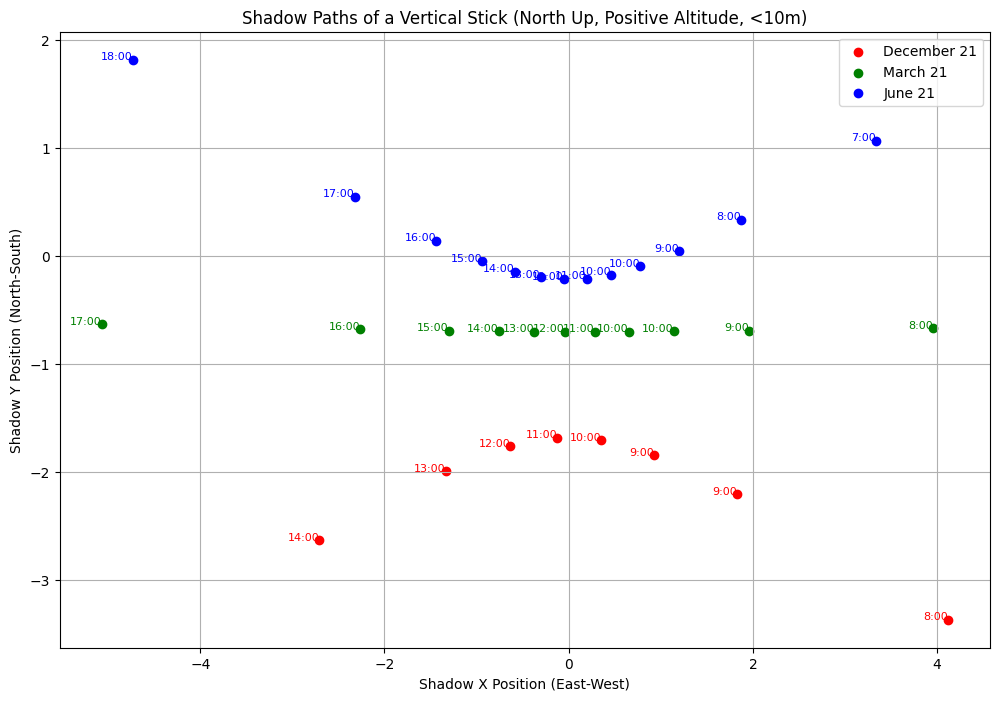

In [5]:
import ephem
import matplotlib.pyplot as plt
import datetime
import numpy as np

# Function to adjust UTC time to local time (CST or CDT)
def adjust_to_local_time(utc_time, date):
    dst_start = datetime.datetime(2024, 3, 10, 2, 0, 0)  # DST starts
    dst_end = datetime.datetime(2024, 11, 3, 2, 0, 0)    # DST ends
    return utc_time - datetime.timedelta(hours=5 if dst_start <= date <= dst_end else 6)

# Function to calculate UTC time from local time
def adjust_to_utc(local_time, date):
    dst_start = datetime.datetime(2024, 3, 10, 2, 0, 0)
    dst_end = datetime.datetime(2024, 11, 3, 2, 0, 0)
    return local_time + datetime.timedelta(hours=5 if dst_start <= date <= dst_end else 6)

# Function to calculate shadow position and length
def calculate_shadow(altitude, azimuth, stick_height=1.0):
    if altitude > 0:
        shadow_length = stick_height / np.tan(altitude)
        if shadow_length < 10:  # Only consider shadow length shorter than 10 meters
            shadow_angle = np.pi/2 - azimuth
            shadow_x = shadow_length * np.cos(shadow_angle)
            shadow_y = shadow_length * np.sin(shadow_angle)
            return shadow_x, shadow_y, shadow_length
    return None, None, None

# Observer information for MTSU
observer = ephem.Observer()
observer.lat, observer.lon = '35.846584', '-86.367874'
observer.elevation = 180  # Elevation in meters
stick_height = 1.0  # Height of the stick in meters

# Dates for tracking the sun's motion
dates = ['2024/12/21', '2024/03/21', '2024/06/21']
colors = ['red', 'green', 'blue']
labels = ['December 21', 'March 21', 'June 21']

plt.figure(figsize=(12, 8))

# Loop over each date
for date, color, label in zip(dates, colors, labels):
    local_start_time = datetime.datetime.strptime(f'{date} 06:00:00', '%Y/%m/%d %H:%M:%S')
    utc_start_time = adjust_to_utc(local_start_time, local_start_time)
    observer.date = utc_start_time
    sun = ephem.Sun(observer)
    shadows = []

    for hour in range(15):  # Hourly from 6 AM to 8 PM local time
        sun.compute(observer)
        utc_time = observer.date.datetime()
        local_time = adjust_to_local_time(utc_time, local_start_time)
        shadow_x, shadow_y, shadow_length = calculate_shadow(sun.alt, sun.az, stick_height)

        if shadow_x is not None and shadow_y is not None:
            shadows.append((shadow_x, shadow_y))
            print(f"Time: {local_time.strftime('%H:%M')}, Azimuth: {sun.az}, Altitude: {sun.alt}, Shadow Length: {shadow_length:.2f}m")
            plt.text(shadow_x, shadow_y, f'{local_time.hour}:00', color=color, fontsize=8, ha='right')

        observer.date += ephem.hour

    if shadows:
        shadows = np.array(shadows)
        plt.scatter(shadows[:, 0], shadows[:, 1], color=color, label=label)

plt.title("Shadow Paths of a Vertical Stick (North Up, Positive Altitude, <10m)")
plt.xlabel("Shadow X Position (East-West)")
plt.ylabel("Shadow Y Position (North-South)")
plt.legend()
plt.grid(True)
plt.savefig("shadow_paths_north_up_positive_altitude.jpg")
plt.show()


